# Evaluation of Generative Model

In [17]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re

import warnings
warnings.filterwarnings('ignore')

import os
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec


[nltk_data] Downloading package punkt to /home/yyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yyk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Import Original Data

In [3]:
df_en = pd.read_csv('clean_lyrics_df.csv')

In [4]:
df_en = df_en.rename(columns={'ALink':'artist', 'SName':'songname', 'SLink':'songlink','Lyric':'lyric'})

In [5]:
top_artist = ['frank sinatra', 'elvis presley', 'dolly parton', 'lil wayne',
              'chris brown', 'guided by voices', 'prince', 'johnny cash', 'bob dylan',
              'george jones', 'neil young', 'bruce springsteen', 'snoop dogg',
              'eminem', '50 cent', 'roy orbison', 'ella fitzgerald', 'taylor swift',
              'waylon jennings', '2pac tupac shakur', 'bb king', 'bon jovi',
              'george strait', 'madonna', 'diana ross', 'bill monroe', 'beach boys',
              'barry manilow', 'alice cooper', 'nas', 'ray charles', 'beck']

In [7]:
# Create a new DataFrame with only the rows that contain the top artists
df_en_top = df_en.copy()
#print a sentence with the size of the top dataset
print("The top dataset contains {} rows.".format(df_en_top.shape[0]))

The top dataset contains 13947 rows.


In [8]:
# Define the original vocabulary
original_vocab = set(['\n', ' ', '!', '?',"'", ',', '-', '.','*', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])  #extracted from vocab_32 in training notebook

# Filter lyrics column to only contain characters in the original vocabulary containing both upper and lower case letters
df_en_top['filtered_lyrics'] = df_en_top['lyric'].apply(lambda x: "".join([c for c in x if c in original_vocab]))

df_en_top.head()

,artist,songname,songlink,lyric,language,filtered_lyrics
0,50 cent,In da Club,/50-cent/in-da-club.html,"go, go, go, go\ngo, go, go shawty\nit's your b...",en,"go, go, go, go\ngo, go, go shawty\nit's your b..."
1,50 cent,21 Questions,/50-cent/21-questions.html,new york city!\nyou are now rapping...with 50 ...,en,new york city!\nyou are now rapping...with 50 ...
2,50 cent,P.I.M.P.,/50-cent/p-i-m-p.html,i don't know what you heard about me\nbut a b*...,en,i don't know what you heard about me\nbut a b*...
3,50 cent,Many Men (Wish Death),/50-cent/many-men-wish-death.html,man we gotta go get something to eat man\ni'm ...,en,man we gotta go get something to eat man\ni'm ...
4,50 cent,Candy Shop,/50-cent/candy-shop.html,yeah...\nuh huh\nso seductive\ni'll take you t...,en,yeah...\nuh huh\nso seductive\ni'll take you t...


In [9]:
def preprocess_lyrics(lyrics):
    # Tokenize the lyrics into words
    words = lyrics.replace('\n', " ")
    words = re.findall(r"\w+\*{0,5}'?\w*", words)

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(w) for w in words]

    return " ".join(lemmatized_words)

# Apply the preprocess_lyrics function to the filtered_lyrics column
df_en_top['processed_lyric'] = df_en_top['filtered_lyrics'].apply(preprocess_lyrics)
df_en_top.head()

,artist,songname,songlink,lyric,language,filtered_lyrics,processed_lyric
0,50 cent,In da Club,/50-cent/in-da-club.html,"go, go, go, go\ngo, go, go shawty\nit's your b...",en,"go, go, go, go\ngo, go, go shawty\nit's your b...",go go go go go go go shawty it's your birthday...
1,50 cent,21 Questions,/50-cent/21-questions.html,new york city!\nyou are now rapping...with 50 ...,en,new york city!\nyou are now rapping...with 50 ...,new york city you are now rapping with 50 cent...
2,50 cent,P.I.M.P.,/50-cent/p-i-m-p.html,i don't know what you heard about me\nbut a b*...,en,i don't know what you heard about me\nbut a b*...,i don't know what you heard about me but a b**...
3,50 cent,Many Men (Wish Death),/50-cent/many-men-wish-death.html,man we gotta go get something to eat man\ni'm ...,en,man we gotta go get something to eat man\ni'm ...,man we gotta go get something to eat man i'm h...
4,50 cent,Candy Shop,/50-cent/candy-shop.html,yeah...\nuh huh\nso seductive\ni'll take you t...,en,yeah...\nuh huh\nso seductive\ni'll take you t...,yeah uh huh so seductive i'll take you to the ...


### Clean and Normalize the Generated Songs

In [10]:
# Read original artist lyrics and generated text
def text_lyrics_preprocess(text_path):
    with open(text_path, "r", encoding="utf-8") as f:
        generated_text = f.read()

    # Tokenize texts into words
    generated_words = generated_text.replace('\n', " ")
    generated_words = re.findall(r"\w+\*{0,5}'?\w*", generated_words)

    #lemmatize the words
    lemmatizer = WordNetLemmatizer()
    generated_words = [lemmatizer.lemmatize(w) for w in generated_words]

    return generated_words #list of strings

top_artist = ['frank sinatra', 'elvis presley', 'dolly parton', 'lil wayne',
              'chris brown', 'guided by voices', 'prince', 'johnny cash', 'bob dylan',
              'george jones', 'neil young', 'bruce springsteen', 'snoop dogg',
              'eminem', '50 cent', 'roy orbison', 'ella fitzgerald', 'taylor swift',
              'waylon jennings', '2pac tupac shakur', 'bb king', 'bon jovi',
              'george strait', 'madonna', 'diana ross', 'bill monroe', 'beach boys',
              'barry manilow', 'alice cooper', 'nas', 'ray charles', 'beck']


### Define Evaluation Metric Functions

1.Word Variation: This metric measures the diversity of the vocabulary used in a song by calculating the ratio of unique words to the total number of words in the song. Higher values indicate more varied vocabulary usage.

2.Song Length: This metric measures the total number of words in a song, providing a simple way to compare the lengths of different songs.

3.Average Line Length: This metric calculates the average number of words per line in a song, which can give an indication of the song's structure.

4.Count Word Repetitions: This metric counts the number of consecutive word repetitions in a song, indicating the presence of repetitive phrases or patterns in the lyrics, which is a strong representation of artists’ unique styles.

5.Point of View: This metric calculates the difference between the number of lines starting with "I" and the number of lines starting with "you" as a percentage of the total number of lines in the song. This provides an indication of the predominant point of view in the lyrics.

6.Vocabulary Overlap: This metric measures the average Jaccard similarity between the vocabulary used in a song and the vocabularies of other songs by the same artist. Lower values indicate less overlap and greater diversity in the artist's vocabulary.

In [11]:
def word_variation(song):
    words = song.split(' ')
    unique_words = set(words)
    if len(words) > 0:
        return round(len(unique_words) / len(words),2)
    else:
        return 0
    
def compute_song_length(song):
    return len(song.split(' '))

def average_line_length(filtered_song):
    song_lines = filtered_song.splitlines()
    return round(sum([len(line.split(' ')) for line in song_lines])/len(song_lines),2)

def count_word_repetitions(song):
    words = song.split()
    counter = 0
    previous_word = None
    for word in words:
        if word == previous_word:
            counter += 1
        previous_word = word
    return counter

def point_of_view(filtered_song):
    song_lines = filtered_song.splitlines()
    i_lines = sum([1 for line in song_lines if line.startswith("i ") or line.startswith("i'")])
    you_lines = sum([1 for line in song_lines if line.startswith("you ") or line.startswith("you'")])
    pov_metric = (i_lines - you_lines) / len(song_lines) * 100
    return round(pov_metric,2)

def vocabulary_overlap(df_artist, song):
    def jaccard_similarity(set_a, set_b):
        intersection = set_a.intersection(set_b)
        union = set_a.union(set_b)
        return len(intersection) / len(union) if len(union) > 0 else 0

    song_vocab = set(song)
    similarities = []
    for index, row in df_artist.iterrows():
        artist_words = row['processed_lyric']
        if artist_words != song:
            artist_vocab = set(artist_words.split())  # Split the string into a list of words before converting to a set
            similarity = jaccard_similarity(artist_vocab, song_vocab)
            similarities.append(similarity)

    # Calculate the average Jaccard similarity
    average_similarity = sum(similarities) / len(similarities)

    return average_similarity

### Creating a Evaluation Dataframe

We define a fuction that takes an artist and compute metric scores for every real and generated song.

In [36]:
def eval_artist_songs(artist_name):
    # get artist df
    df_artist = df_en_top[df_en_top.artist == artist_name]
    df_artist = df_artist[['artist', 'songname', 'filtered_lyrics', 'processed_lyric']].copy()

    # add evaluation variables
    df_artist['word_variation'] = df_artist.processed_lyric.apply(lambda x: word_variation(x))
    df_artist['song_length'] = df_artist.processed_lyric.apply(lambda x: compute_song_length(x))
    #df_artist['word_repetition'] = df_artist.processed_lyric.apply(lambda x: count_word_repetitions(x))
    df_artist['avg_line_len'] = df_artist.filtered_lyrics.apply(lambda x: average_line_length(x))
    df_artist['count_word_repetitions'] = df_artist.processed_lyric.apply(lambda x: count_word_repetitions(x))
    df_artist['point_of_view'] = df_artist.filtered_lyrics.apply(lambda x: point_of_view(x))
    df_artist['vocabulary_overlap'] = df_artist.processed_lyric.apply(lambda x: vocabulary_overlap(df_artist, x))

    # add color blue for visualization purposes
    df_artist['color'] = 'mediumblue'
    df_artist['song_type'] = 'real'

    # make variables for generated song
    directory_gru = 'MySavedModel/' + artist_name
    directory_lstm = 'MyLSTMModel/' + artist_name

    for directory in [directory_gru,directory_lstm]:
        if directory == directory_gru:
            g_color = 'red'
            g_stype = 'GRU'
        elif directory == directory_lstm:
            g_color = 'orange'
            g_stype = 'LSTM'
        for filename in os.listdir(directory):
            with open(directory+"/"+filename, "r", encoding="utf-8") as f:
                generated_text = f.read()
            filtered_lyrics = generated_text.lower()
            f.close()
            generated_words = text_lyrics_preprocess(directory+"/"+filename)
            generated_song = " ".join(generated_words)
            generated_song = generated_song.lower()
            song_name = filename
            processed_lyrics = generated_song
            g_word_var = word_variation(generated_song)
            g_song_len = compute_song_length(generated_song)
            g_avg_line_len = average_line_length(filtered_lyrics)
            g_count_word_repetitions = count_word_repetitions(generated_song)
            g_point_of_view = point_of_view(filtered_lyrics)
            g_vocabulary_overlap = vocabulary_overlap(df_artist, processed_lyrics)

            # Insert generated song into dataframe
            df_artist.loc[len(df_artist.index)] = [artist_name, song_name, filtered_lyrics, processed_lyrics, g_word_var, g_song_len, g_avg_line_len, g_count_word_repetitions, g_point_of_view, g_vocabulary_overlap, g_color, g_stype] 
    
    return df_artist

### Define a Function that Summarize Metric Scores for Real and Generated Songs

In [80]:
def summarize_eval_metrics(df):
    summary_df = df.groupby('song_type').agg({'vocabulary_overlap': 'mean', 'word_variation':'mean', 'song_length':'mean', 'avg_line_len':'mean', 'count_word_repetitions':'mean', 'point_of_view':'mean'})
    return summary_df

### Create Comparison Plots

In [81]:
def linelen_vs_wordvar(df, artist_name):

    fig = plt.figure(figsize=(8,8));

    fig.suptitle('How Our Generated {} Song Performs\nAverage Line Length vs Word Variation'.format(artist_name.capitalize()), fontsize=18);

    gs = GridSpec(4, 4);

    ax_scatter = fig.add_subplot(gs[1:4, 0:3]);
    ax_hist_x = fig.add_subplot(gs[0,0:3]);
    ax_hist_y = fig.add_subplot(gs[1:4, 3]);

    df_real = df[df['color'] == 'mediumblue']
    df_gru = df[df['color'] == 'red']
    df_lstm = df[df['color'] == 'orange']

    ax_scatter.scatter(x=df_real.avg_line_len, y=df_real.word_variation, c='mediumblue',alpha=0.8);
    ax_scatter.scatter(x=df_gru.avg_line_len, y=df_gru.word_variation, c='red', alpha=0.8);
    ax_scatter.scatter(x=df_lstm.avg_line_len, y=df_lstm.word_variation, c='orange', alpha=0.6);

    ax_scatter.set_xlabel('Average Line Length');
    ax_scatter.set_ylabel('Word Variation');

    legends = [Line2D([0], [0], marker='o', color='red', label='GRU Generated',
                          markerfacecolor='red', markersize=8, linestyle='', alpha=0.5),
               Line2D([0], [0], marker='o', color='orange', label='LSTM Generated',
                          markerfacecolor='orange', markersize=8, linestyle='', alpha=0.5),
               Line2D([0], [0], marker='o', color='mediumblue', label='Real Songs',
                          markerfacecolor='blue', markersize=8, linestyle='')]

    ax_scatter.legend(handles=legends)

    ax_hist_x.hist(df['avg_line_len'], bins=50, color='mediumblue');
    ax_hist_x.set_xticks([]);
    ax_hist_x.set_ylabel('Avg Line Len Frequency');


    ax_hist_y.hist(df['word_variation'], orientation = 'horizontal', bins=50, color='mediumblue');
    ax_hist_y.set_yticks([]);
    ax_hist_y.set_xlabel('Word Var Frequency');


In [82]:
def songlen_vs_wordvar(df, artist_name):
    
    fig = plt.figure(figsize=(8,8));

    fig.suptitle('How Our Generated {} Song Performs\nSong Length vs Word Variation'.format(artist_name.capitalize()), fontsize=18);

    gs = GridSpec(4, 4);

    ax_scatter = fig.add_subplot(gs[1:4, 0:3]);
    ax_hist_x = fig.add_subplot(gs[0,0:3]);
    ax_hist_y = fig.add_subplot(gs[1:4, 3]);

    df_real = df[df['color'] == 'mediumblue']
    df_gru = df[df['color'] == 'red']
    df_lstm = df[df['color'] == 'orange']

    ax_scatter.scatter(x=df_real.song_length, y=df_real.word_variation, c='mediumblue', alpha=0.8);
    ax_scatter.scatter(x=df_gru.song_length, y=df_gru.word_variation, c='red', alpha=0.8);
    ax_scatter.scatter(x=df_lstm.song_length, y=df_lstm.word_variation, c='orange', alpha=0.6);

    ax_scatter.set_xlabel('Song Length (# of words)');
    ax_scatter.set_ylabel('Word Variation');
    
    legends = [Line2D([0], [0], marker='o', color='red', label='GRU Generated',
                          markerfacecolor='red', markersize=8, linestyle='', alpha=0.5),
               Line2D([0], [0], marker='o', color='orange', label='LSTM Generated',
                          markerfacecolor='orange', markersize=8, linestyle='', alpha=0.5),
               Line2D([0], [0], marker='o', color='mediumblue', label='Real Songs',
                          markerfacecolor='blue', markersize=8, linestyle='')]

    ax_scatter.legend(handles=legends)

    ax_hist_x.hist(df['song_length'], bins=50, color='mediumblue');
    ax_hist_x.set_xticks([]);
    ax_hist_x.set_ylabel('Song Len Frequency');


    ax_hist_y.hist(df['word_variation'], orientation = 'horizontal', bins=50, color='mediumblue');
    ax_hist_y.set_yticks([]);
    ax_hist_y.set_xlabel('Word Var Frequency');


### Evaluation on Eminem

In [83]:
em_df = eval_artist_songs('eminem')

In [84]:
summarize_eval_metrics(em_df)

,vocabulary_overlap,word_variation,song_length,avg_line_len,count_word_repetitions,point_of_view
song_type,,,,,,
GRU,0.013947,0.647000,211.600000,8.086000,0.200000,10.826000
LSTM,0.013983,0.697000,205.600000,8.273000,0.500000,6.869000
real,0.014246,0.471145,653.529262,8.229746,4.287532,7.552239


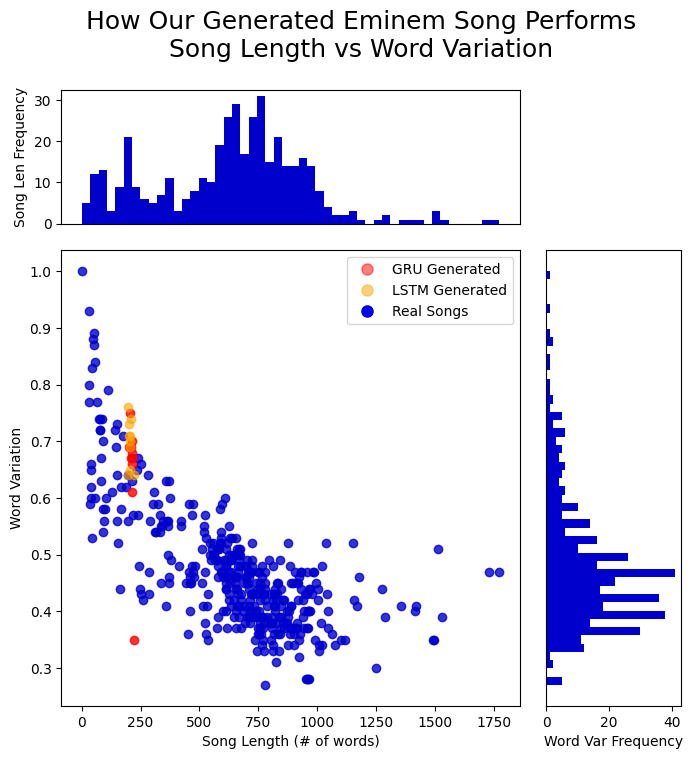

In [85]:
songlen_vs_wordvar(em_df, 'eminem')

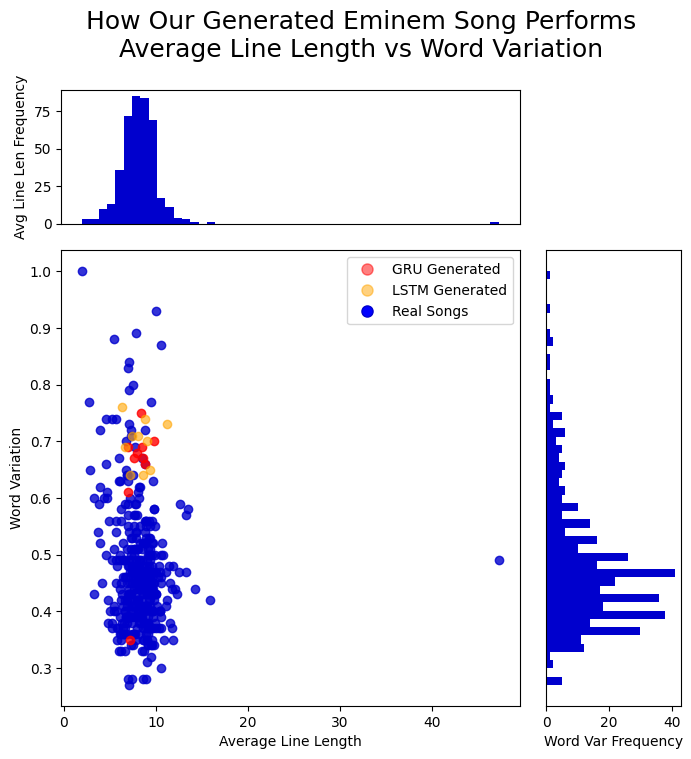

In [86]:
linelen_vs_wordvar(em_df, 'eminem')

### Evaluation on Taylor Swift

In [87]:
ts_df = eval_artist_songs('taylor swift')

In [88]:
summarize_eval_metrics(ts_df)

,vocabulary_overlap,word_variation,song_length,avg_line_len,count_word_repetitions,point_of_view
song_type,,,,,,
GRU,0.016007,0.512000,224.400,6.649000,21.700000,4.9200
LSTM,0.015976,0.667000,212.900,6.654000,1.000000,7.0830
real,0.015992,0.373778,319.175,6.647639,4.619444,6.2835


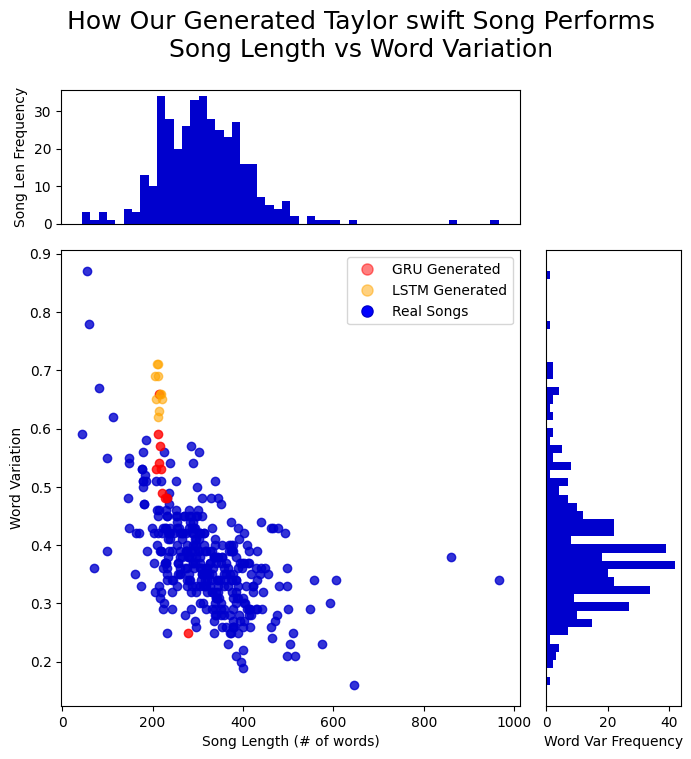

In [89]:
songlen_vs_wordvar(ts_df, 'taylor swift')

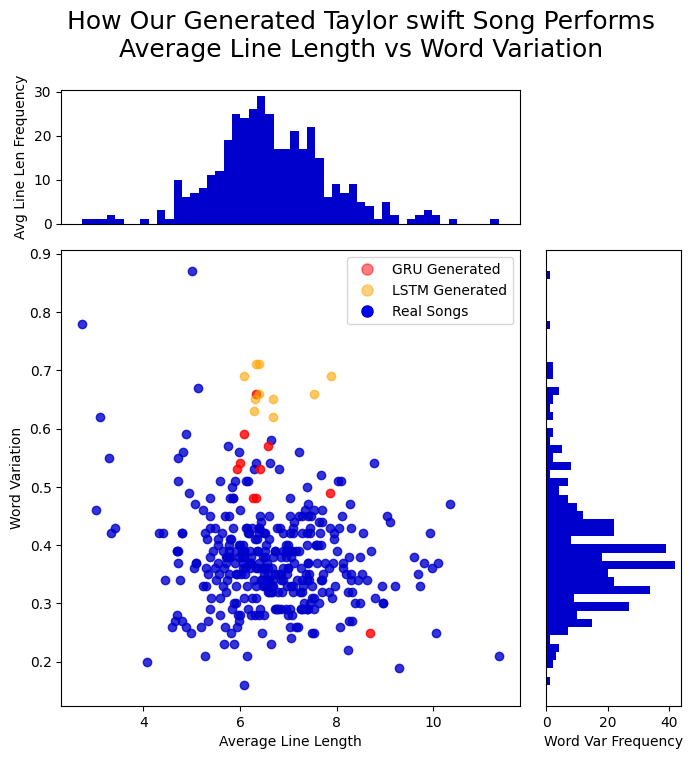

In [90]:
linelen_vs_wordvar(ts_df, 'taylor swift')